In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

warnings.filterwarnings("ignore")

In [2]:
BASE_PATH = os.path.dirname(os.getcwd())
filepath = os.path.join(BASE_PATH, "reports", "descriptors.csv")

descriptors = pd.read_csv(filepath)

In [3]:
descriptors.dataset.apply(len).max()

np.int64(9)

In [4]:
# remove = descriptors.query("dataset == 'Sceletium'").index
# descriptors.drop(remove, axis=0, inplace=True)
# descriptors.reset_index(inplace=True, drop=True)
descriptors.shape

(139486, 19)

In [5]:
order = {}
for name, group in descriptors.groupby("dataset"):
    l = descriptors.dataset.apply(len).max() + 1
    print(f"{name :10}: {len(group)}")
    order[name] = len(group)

order = {k: v for k, v in sorted(order.items(), key=lambda item: item[1], reverse=True)}

Sceletium : 15
chembl    : 78163
drugbank  : 11307
enamine   : 49974
pseudoNPs : 27


In [6]:
order

{'chembl': 78163,
 'enamine': 49974,
 'drugbank': 11307,
 'pseudoNPs': 27,
 'Sceletium': 15}

In [7]:
feature_cols = [col for col in descriptors.columns if col not in ["ID", "dataset"]]

X = descriptors.loc[:, feature_cols]
X.shape

(139486, 17)

In [8]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [9]:
pca = PCA(n_components=10, random_state=2025)
X_pca = pca.fit_transform(X_sc)

In [10]:
print(pca.explained_variance_ratio_)

[0.35709607 0.15109255 0.12611278 0.10264854 0.06401005 0.05221581
 0.04171935 0.03461582 0.0237286  0.01770185]


In [11]:
pca.explained_variance_ratio_.cumsum()

array([0.35709607, 0.50818862, 0.6343014 , 0.73694993, 0.80095998,
       0.85317579, 0.89489514, 0.92951096, 0.95323956, 0.97094141])

In [12]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df = pd.concat((descriptors.loc[:, ["ID", "dataset"]], X_pca_df), axis=1)
X_pca_df.to_csv(os.path.join(BASE_PATH, "reports", "PCA_scores.csv"), index=False)

pca.explained_variance_ratio_.tofile(os.path.join(BASE_PATH, "reports", "PCA_exp_var.csv"), sep=",")

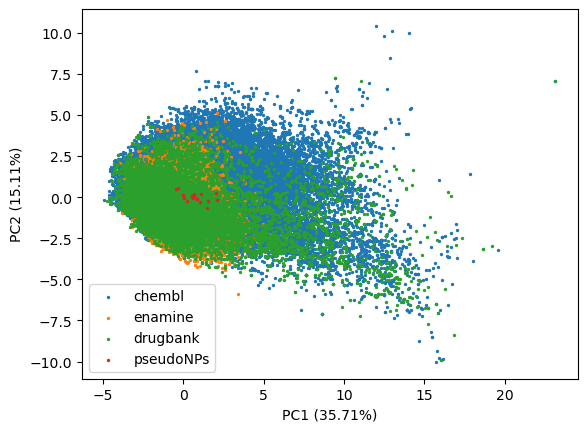

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
for data in order.keys():
    if data != "Sceletium":
        idx = descriptors.query("dataset == @data").index
        ax.scatter(X_pca[idx, 0], X_pca[idx, 1], s=2, label=data)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
# plt.xlim((-3,3))
plt.legend()
plt.show()

In [14]:
comparisons = descriptors.query("dataset in ['pseudoNPs', 'Sceletium']").copy()
comparisons["new_set"] = comparisons["dataset"]
print(comparisons.shape[0])
for file in ["Amaryllidaceae.csv", "MIAs.csv"]:
    idx = pd.read_csv(os.path.join(BASE_PATH, "data", file))
    tmp = descriptors.query("ID in @idx['chembl_id']").copy()
    tmp["new_set"] = file.split(".")[0]
    comparisons = pd.concat((comparisons, tmp), axis=0)
    print(comparisons.shape[0])


42
149
1198


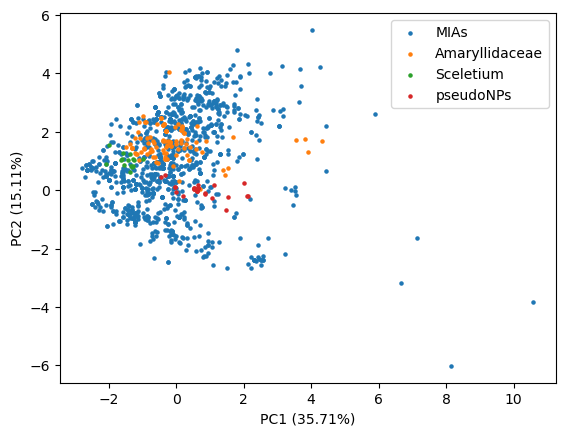

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
# for data in comparisons.new_set.unique():
for data in ["MIAs", "Amaryllidaceae", "Sceletium", "pseudoNPs"]:
    idx = comparisons.query("new_set == @data").index
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], s=5, label=data)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
# plt.xlim((-3,3))
plt.legend()
plt.show()

In [17]:
feature_cols_alk = [col for col in comparisons.columns if col not in ["ID", "dataset", "new_set"]]

X_alk = comparisons.loc[:, feature_cols_alk]
X_alk.shape

(1198, 17)

In [19]:
scaler = StandardScaler()
X_sc_alk = scaler.fit_transform(X_alk)

In [20]:
pca = PCA(n_components=10, random_state=2025)
X_pca_alk = pca.fit_transform(X_sc_alk)

In [22]:
pca.explained_variance_ratio_.cumsum()

array([0.30739553, 0.58392572, 0.69681999, 0.76710824, 0.82514165,
       0.87074282, 0.91256566, 0.93826291, 0.95996659, 0.9766246 ])

In [ ]:
for data in ["MIAs", "Amaryllidaceae", "Sceletium", "pseudoNPs"]:
    idx = comparisons.query("new_set == @data").index
    print(idx.max())


78150
77825
41
26


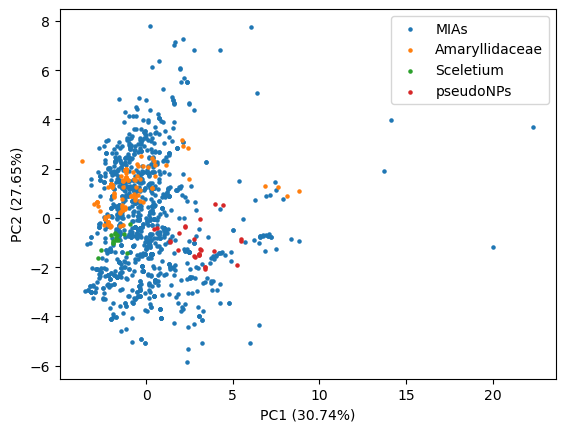

In [29]:
comp = comparisons.copy()
comp.reset_index(inplace=True, drop=True)

fig = plt.figure()
ax = fig.add_subplot()
# for data in comparisons.new_set.unique():
for data in ["MIAs", "Amaryllidaceae", "Sceletium", "pseudoNPs"]:
    idx = comp.query("new_set == @data").index
    ax.scatter(X_pca_alk[idx, 0], X_pca_alk[idx, 1], s=5, label=data)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
# plt.xlim((-3,3))
plt.legend()
plt.show()

In [66]:
X_pca_alk_df = pd.DataFrame(X_pca_alk)
X_pca_alk_df = pd.concat((comp.loc[:, ["ID", "new_set"]], X_pca_alk_df), axis=1)
X_pca_alk_df.to_csv(os.path.join(BASE_PATH, "reports", "PCA_scores_alkaloids.csv"), index=False)

pca.explained_variance_ratio_.tofile(os.path.join(BASE_PATH, "reports", "PCA_exp_var_alkaloids.csv"), sep=",")

In [16]:
def run_umap(neighbors, dist):
    umap_model = umap.UMAP(metric="euclidean",
                            n_neighbors=neighbors,
                            n_components=2,
                            min_dist=dist,
                            random_state=2025)
    X_umap = umap_model.fit_transform(X_sc)

    fig = plt.figure()
    ax = fig.add_subplot()
    for data in order.keys():
        idx = descriptors.query("dataset == @data").index
        ax.scatter(X_umap[idx, 0], X_umap[idx, 1], s=2, label=data)

    plt.legend()
    plt.show()

    return X_umap

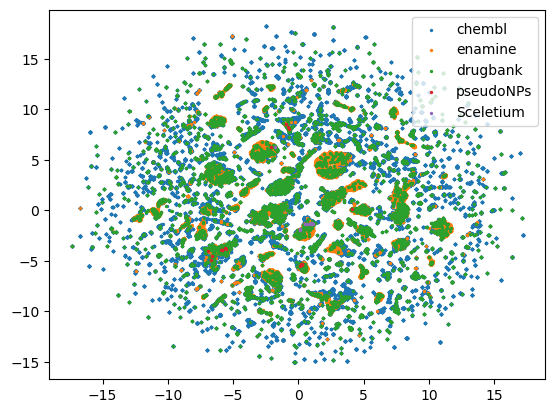

In [17]:
X_umap = run_umap(10, 0.01)

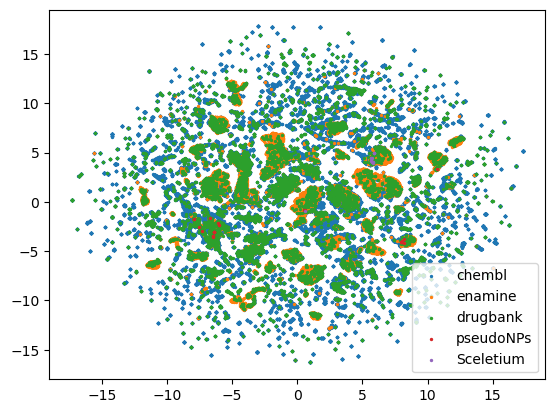

In [18]:
X_umap = run_umap(10, 0.1)

In [19]:
X_umap_df = pd.DataFrame(X_umap)
X_umap_df = pd.concat((descriptors.loc[:, ["ID", "dataset"]], X_umap_df), axis=1)
X_umap_df.to_csv(os.path.join(BASE_PATH, "reports", "UMAP_n10_d0_1.csv"), index=False)

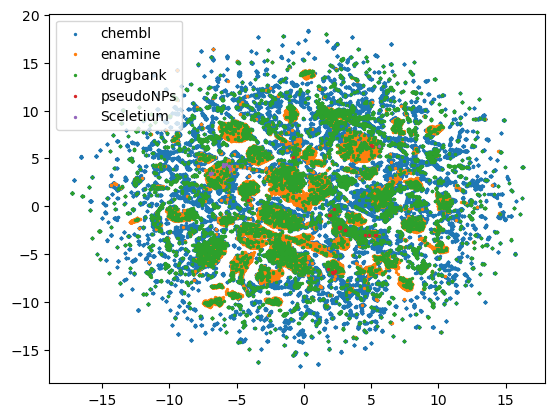

In [20]:
X_umap = run_umap(10, 0.2)

In [21]:
X_umap_df = pd.DataFrame(X_umap)
X_umap_df = pd.concat((descriptors.loc[:, ["ID", "dataset"]], X_umap_df), axis=1)
X_umap_df.to_csv(os.path.join(BASE_PATH, "reports", "UMAP_n10_d0_2.csv"), index=False)

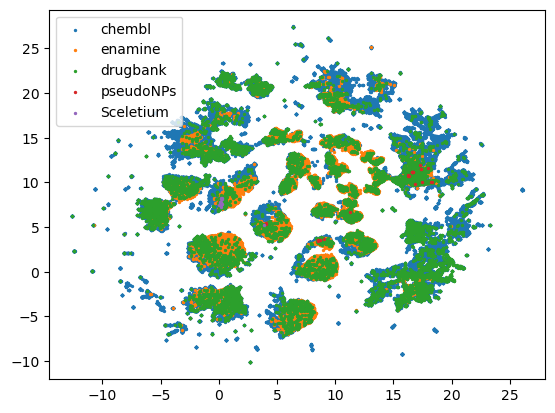

array([[ 8.478029 ,  3.5130124],
       [16.588062 , 11.147014 ],
       [11.226429 ,  6.6745734],
       ...,
       [13.217304 , -2.5469391],
       [17.301672 ,  2.0816104],
       [13.207975 , -2.4947834]], shape=(139486, 2), dtype=float32)

In [22]:
run_umap(20, 0.2)

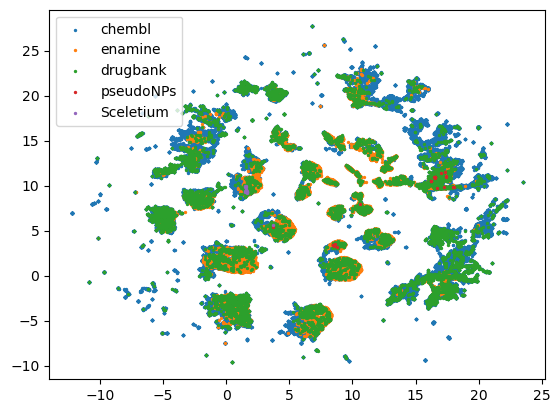

array([[ 8.448118 ,  3.381458 ],
       [16.496809 , 10.8991375],
       [10.623189 ,  7.9434958],
       ...,
       [13.656174 , -2.563579 ],
       [17.550552 ,  2.2284064],
       [13.66539  , -2.556588 ]], shape=(139486, 2), dtype=float32)

In [23]:
run_umap(20, 0.1)

In [34]:
def run_umap_alk(neighbors, dist):
    umap_model = umap.UMAP(metric="euclidean",
                            n_neighbors=neighbors,
                            n_components=2,
                            min_dist=dist,
                            random_state=2025)
    X_umap = umap_model.fit_transform(X_sc_alk)

    fig = plt.figure()
    ax = fig.add_subplot()
    for data in ["MIAs", "Amaryllidaceae", "Sceletium", "pseudoNPs"]:
        idx = comp.query("new_set == @data").index
        ax.scatter(X_umap[idx, 0], X_umap[idx, 1], s=2, label=data)

    plt.legend()
    plt.show()

    return X_umap

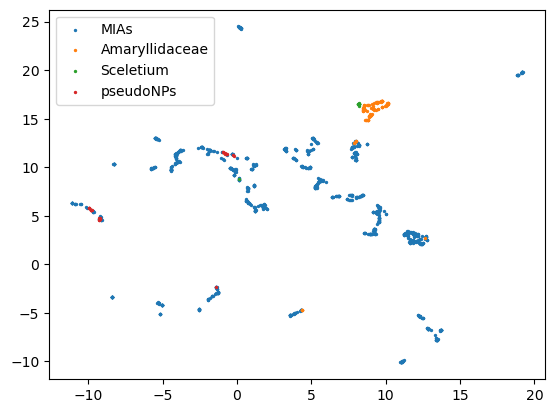

In [35]:
X_umap = run_umap_alk(10, 0.01)

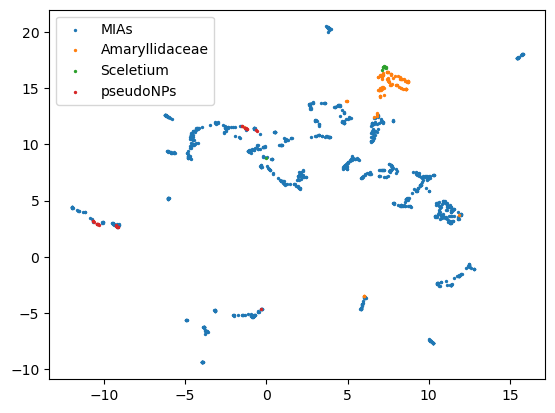

In [36]:
X_umap = run_umap_alk(10, 0.1)

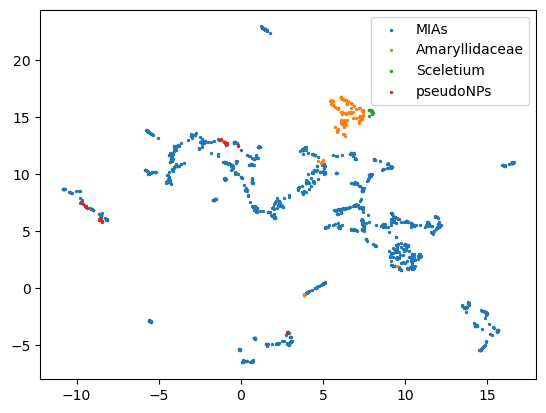

In [37]:
X_umap = run_umap_alk(10, 0.2)

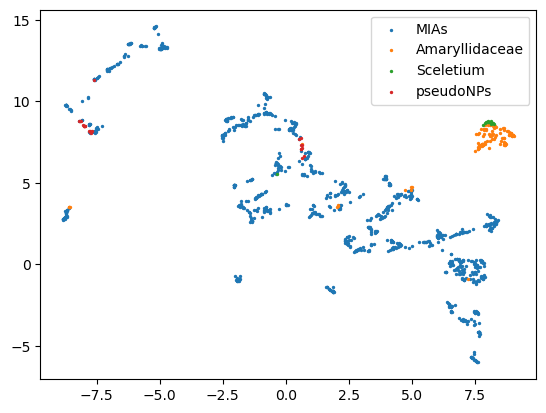

In [38]:
X_umap = run_umap_alk(20, 0.1)

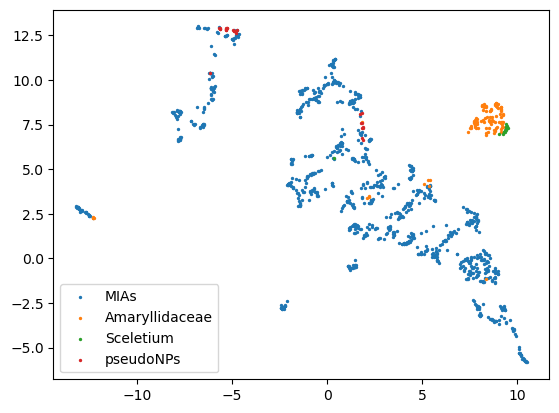

In [39]:
X_umap = run_umap_alk(20, 0.2)

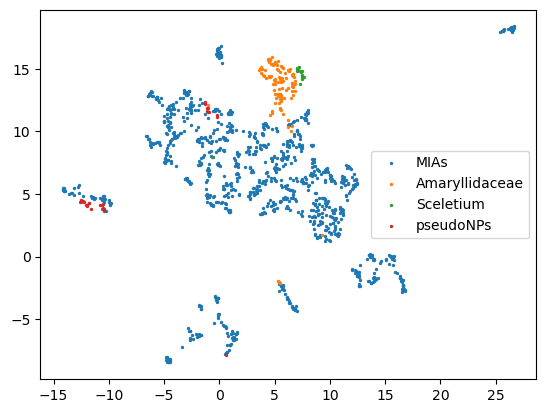

In [55]:
X_umap = run_umap_alk(10, 0.5)

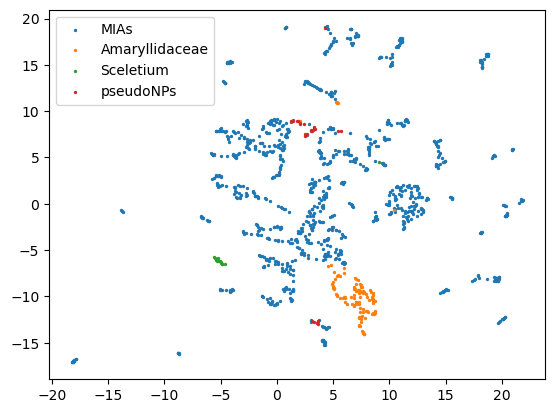

In [63]:
X_umap = run_umap_alk(5, 0.5)